In [98]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 

In [100]:
ecommerce = pd.read_csv('ecommerce_customer_churn_dataset.csv')
ecommerce.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [102]:
col = ['Login_Frequency', 
       'Session_Duration_Avg', 
       'Pages_Per_Session', 
       'Total_Purchases']
# Clean all N/A 
clean_df = ecommerce[col].dropna()
clean_df

,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Total_Purchases
0,14.0,27.4,6.0,9.0
1,15.0,42.7,10.3,19.5
2,10.0,24.8,1.6,9.1
3,10.0,38.4,14.8,15.0
5,6.0,21.9,6.9,12.0
...,...,...,...,...
49994,8.0,21.0,8.4,16.0
49995,10.0,35.8,8.8,13.0
49996,21.0,32.4,9.6,15.0
49997,19.0,40.3,10.4,12.0


In [104]:
# Is website making consumers buy? 
features = ['Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session']
X = clean_df[features]
y = clean_df['Total_Purchases']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=0)

scale = StandardScaler() 
X_train_scale = scale.fit_transform(X_train) 
X_test_scale = scale.transform(X_test) 

knn = KNeighborsRegressor(n_neighbors = 10) 
knn.fit(X_train_scale, y_train)

y_pred = knn.predict(X_test_scale) 

mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print(f'MSE: {mse:.4f}') 
print(f'r2: {r2:.4f}')

MSE: 27.1020
r2: 0.4411


<function matplotlib.pyplot.show(close=None, block=None)>

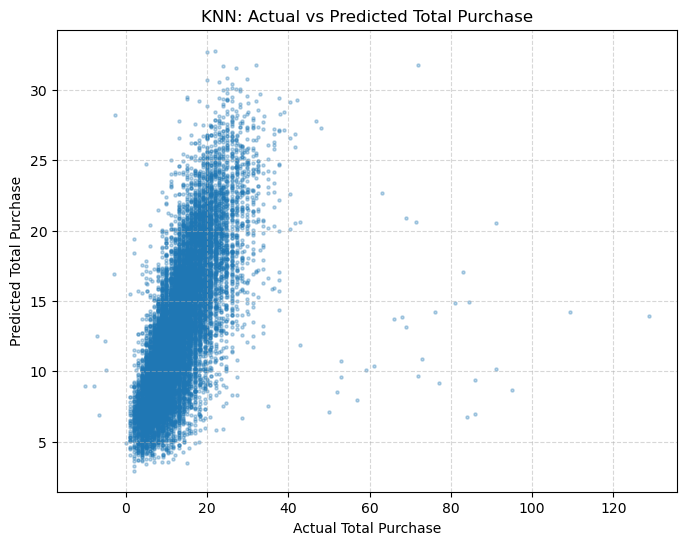

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3, s=5) 
plt.xlabel('Actual Total Purchase') 
plt.ylabel('Predicted Total Purchase') 
plt.title('KNN: Actual vs Predicted Total Purchase') 
plt.grid(True, linestyle='--', alpha=0.5)
plt.show